In [25]:
import numpy as np
from numpy.random import multivariate_normal

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.svm import SVC


In [58]:
def plot(w, X, Y):
    plt.figure(figsize=(8, 7))
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
    max_value = X.max() + 1
    min_value = X.min() - 1
    
    line = np.linspace(min_value, max_value)
    
    plt.plot(line, -(line * w[1] + w[0]) / w[2])
    plt.ylim(min_value, max_value)
    plt.xlim(min_value, max_value)
    plt.show()

def run(data_num, pai1, pai2, mu1, mu2, sigma1, sigma2):
    x1_data_num = int(data_num * pai1)
    x2_data_num = int(data_num * pai2)

    x1 = multivariate_normal(mu1, sigma1, x1_data_num)
    x2 = multivariate_normal(mu2, sigma2, x2_data_num)
    
    Y = np.hstack((np.zeros(x1_data_num), np.ones(x2_data_num)))
    X = np.vstack((x1, x2))
    
    # sc = StandardScaler()
    # sc.fit(X)
    # X_train_std = sc.transform(X)
    # X, mesh1_matrix, mesh2_matrix = make_data(np.vstack((x1, x2)))
    svc = SVC(kernel='linear', random_state=None)

    svc.fit(X, Y)
    print(svc.coef_[0])
    coef = svc.coef_[0]
    intercept = svc.intercept_
    
    plot(np.hstack((intercept, coef)), X, Y)

[ 0.13590435 -0.13881765]


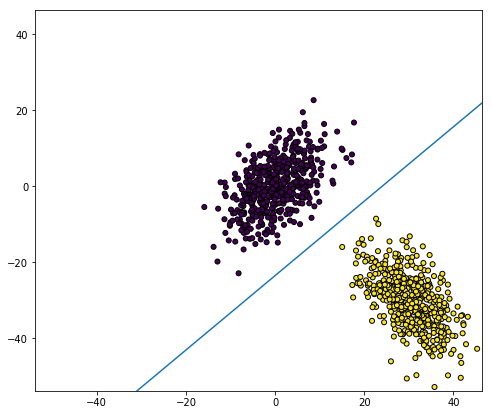

In [59]:
def main1():
    data_num = 1000 # param
    pai1 = 0.5 # param
    pai2 = 1 - pai1

    mu1 = np.array([0, 0]) # param
    sigma1 = np.array([[30, 20], [20, 50]]) # param

    mu2 = np.array([30, -30])  # param
    sigma2 = np.array([[30, -20], [-20, 50]]) # param
    run(data_num, pai1, pai2, mu1, mu2, sigma1, sigma2)

main1()